In [10]:
import pandas as pd
import numpy as np
import scipy.stats
from collections import defaultdict
import re
import pickle

In [11]:
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects.numpy2ri import numpy2ri

def ratio_singleAA(s, aa):
    return s.count(aa)/len(s)

def cal_dist_corr(x, y):
    ro.conversion.py2ri = numpy2ri
    energy = importr('energy')
    dCorr = energy.dcor(x, y)[0]
    return dCorr

def cal_dist_corr_aminoacids(df):
    ro.conversion.py2ri = numpy2ri
    energy = importr('energy')

    lAAs = list("AVLMFYWSTNQCGPRHKDE")
    arrDiff = df['NormedApexEtDiff']
    lRet = []
    for aa in lAAs:
        arrRatio = df['Peptide'].apply(ratio_singleAA, args=[aa])
        dCorr = energy.dcor(arrRatio, arrDiff)[0]
        lRet.append({'DistanceCorr': dCorr,
                     'AminoAcid': aa})
    return lRet

In [12]:
lEtInfoNames = """DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv  
DE6plex_1_1_1_1_O_J100_NCP1_1229.training.tsv  
DE6plex_1_1_1_2_N_J100_NCP1_1228.training.tsv  
DE6plex_1_1_1_2_O_J100_NCP1_1230.training.tsv  
DE6plex_1_1_1_NCP1_J100_20171215.training.tsv  
DE6plex_1_1_1_NCP1_J100_20171218_1.training.tsv
DE6plex_1_1_1_N_J100_NCP1_1228.training.tsv
DE6plex_1_1_1_O_J100_NCP1_1228.training.tsv
DE6plex_1_1_2_NCP1_J100_20171218.training.tsv
DE6plex_1_1_2_NCP1_J100_20171218_2.training.tsv""".split()

dAllEtInfos = {}

lDfs2Merge = []
for name in lEtInfoNames:
    path = "./RawTrainingData/%s"%name
    dfIn = pd.io.parsers.read_table(path, index_col=False)
    print(name)
    dfIn['SampleName'] = name
    lDfs2Merge.append(dfIn)

DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
DE6plex_1_1_1_1_O_J100_NCP1_1229.training.tsv
DE6plex_1_1_1_2_N_J100_NCP1_1228.training.tsv
DE6plex_1_1_1_2_O_J100_NCP1_1230.training.tsv
DE6plex_1_1_1_NCP1_J100_20171215.training.tsv
DE6plex_1_1_1_NCP1_J100_20171218_1.training.tsv
DE6plex_1_1_1_N_J100_NCP1_1228.training.tsv
DE6plex_1_1_1_O_J100_NCP1_1228.training.tsv
DE6plex_1_1_2_NCP1_J100_20171218.training.tsv
DE6plex_1_1_2_NCP1_J100_20171218_2.training.tsv


In [13]:
dfMerged = pd.concat(lDfs2Merge, ignore_index=True)
dfMerged = dfMerged[dfMerged['Channel']!=0] # remove channel 0
print(len(dfMerged))
dfMerged.head(10)

73542


,DEFeatureIdx,Peptide,Charge,SpecEValue,Channel,Quantity,Cosine,NormedApexEtDiff,Dnum,NormedRepreEt,PeptideLength,[K]Ratio,SampleName
1,0,AVLFCLSEDKK,3,1.166856e-14,1,95698930.0,0.959182,0.000786,6,0.416805,11,0.181818,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
2,0,AVLFCLSEDKK,3,1.166856e-14,2,88035020.0,0.928878,0.000969,12,0.416805,11,0.181818,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
3,0,AVLFCLSEDKK,3,1.166856e-14,3,51755270.0,0.990995,0.005089,18,0.416805,11,0.181818,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
4,0,AVLFCLSEDKK,3,1.166856e-14,4,48006030.0,0.970067,0.004899,24,0.416805,11,0.181818,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
5,0,AVLFCLSEDKK,3,1.166856e-14,5,44217480.0,0.978701,0.006911,30,0.416805,11,0.181818,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
7,1,LWNTLGVCK,2,5.470512e-13,2,28104560.0,0.932260,0.001248,8,0.348855,9,0.111111,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
8,1,LWNTLGVCK,2,5.470512e-13,3,32101760.0,0.948683,0.003302,12,0.348855,9,0.111111,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
9,1,LWNTLGVCK,2,5.470512e-13,4,24932710.0,0.989491,0.004273,16,0.348855,9,0.111111,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
10,1,LWNTLGVCK,2,5.470512e-13,5,28280620.0,0.973992,0.004750,20,0.348855,9,0.111111,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv
12,2,ILPTLEAVAALGNK,3,8.961506e-14,1,4964044.0,0.904243,0.001476,4,1.062110,14,0.071429,DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv


Check inter-sample variance

File1	File2	Correlation	PValue	RMSE	MAE	TableLength
1	2	0.853278	0.000000	0.001312	0.000777	9765
1	3	0.928738	0.000000	0.000873	0.000558	11526
1	4	0.859546	0.000000	0.001258	0.000758	9312
1	5	0.880817	0.000000	0.001231	0.000812	10238
1	6	0.874772	0.000000	0.001185	0.000762	10489
1	7	0.909471	0.000000	0.001000	0.000636	10934
1	8	0.837863	0.000000	0.001342	0.000836	9297
1	9	0.867063	0.000000	0.001234	0.000794	10353
1	10	0.853413	0.000000	0.001307	0.000802	10225
2	3	0.874966	0.000000	0.001147	0.000697	9746
2	4	0.913066	0.000000	0.000947	0.000599	10459
2	5	0.809143	0.000000	0.001531	0.000953	9264
2	6	0.858222	0.000000	0.001260	0.000826	9286
2	7	0.833778	0.000000	0.001346	0.000789	9232
2	8	0.871152	0.000000	0.001151	0.000752	9534
2	9	0.841402	0.000000	0.001360	0.000865	9231
2	10	0.861337	0.000000	0.001275	0.000801	9565
3	4	0.872272	0.000000	0.001159	0.000709	9492
3	5	0.871474	0.000000	0.001200	0.000790	10295
3	6	0.857894	0.000000	0.001202	0.000767	10421
3	7	0.885781	0.000000	0.001051	0.0006

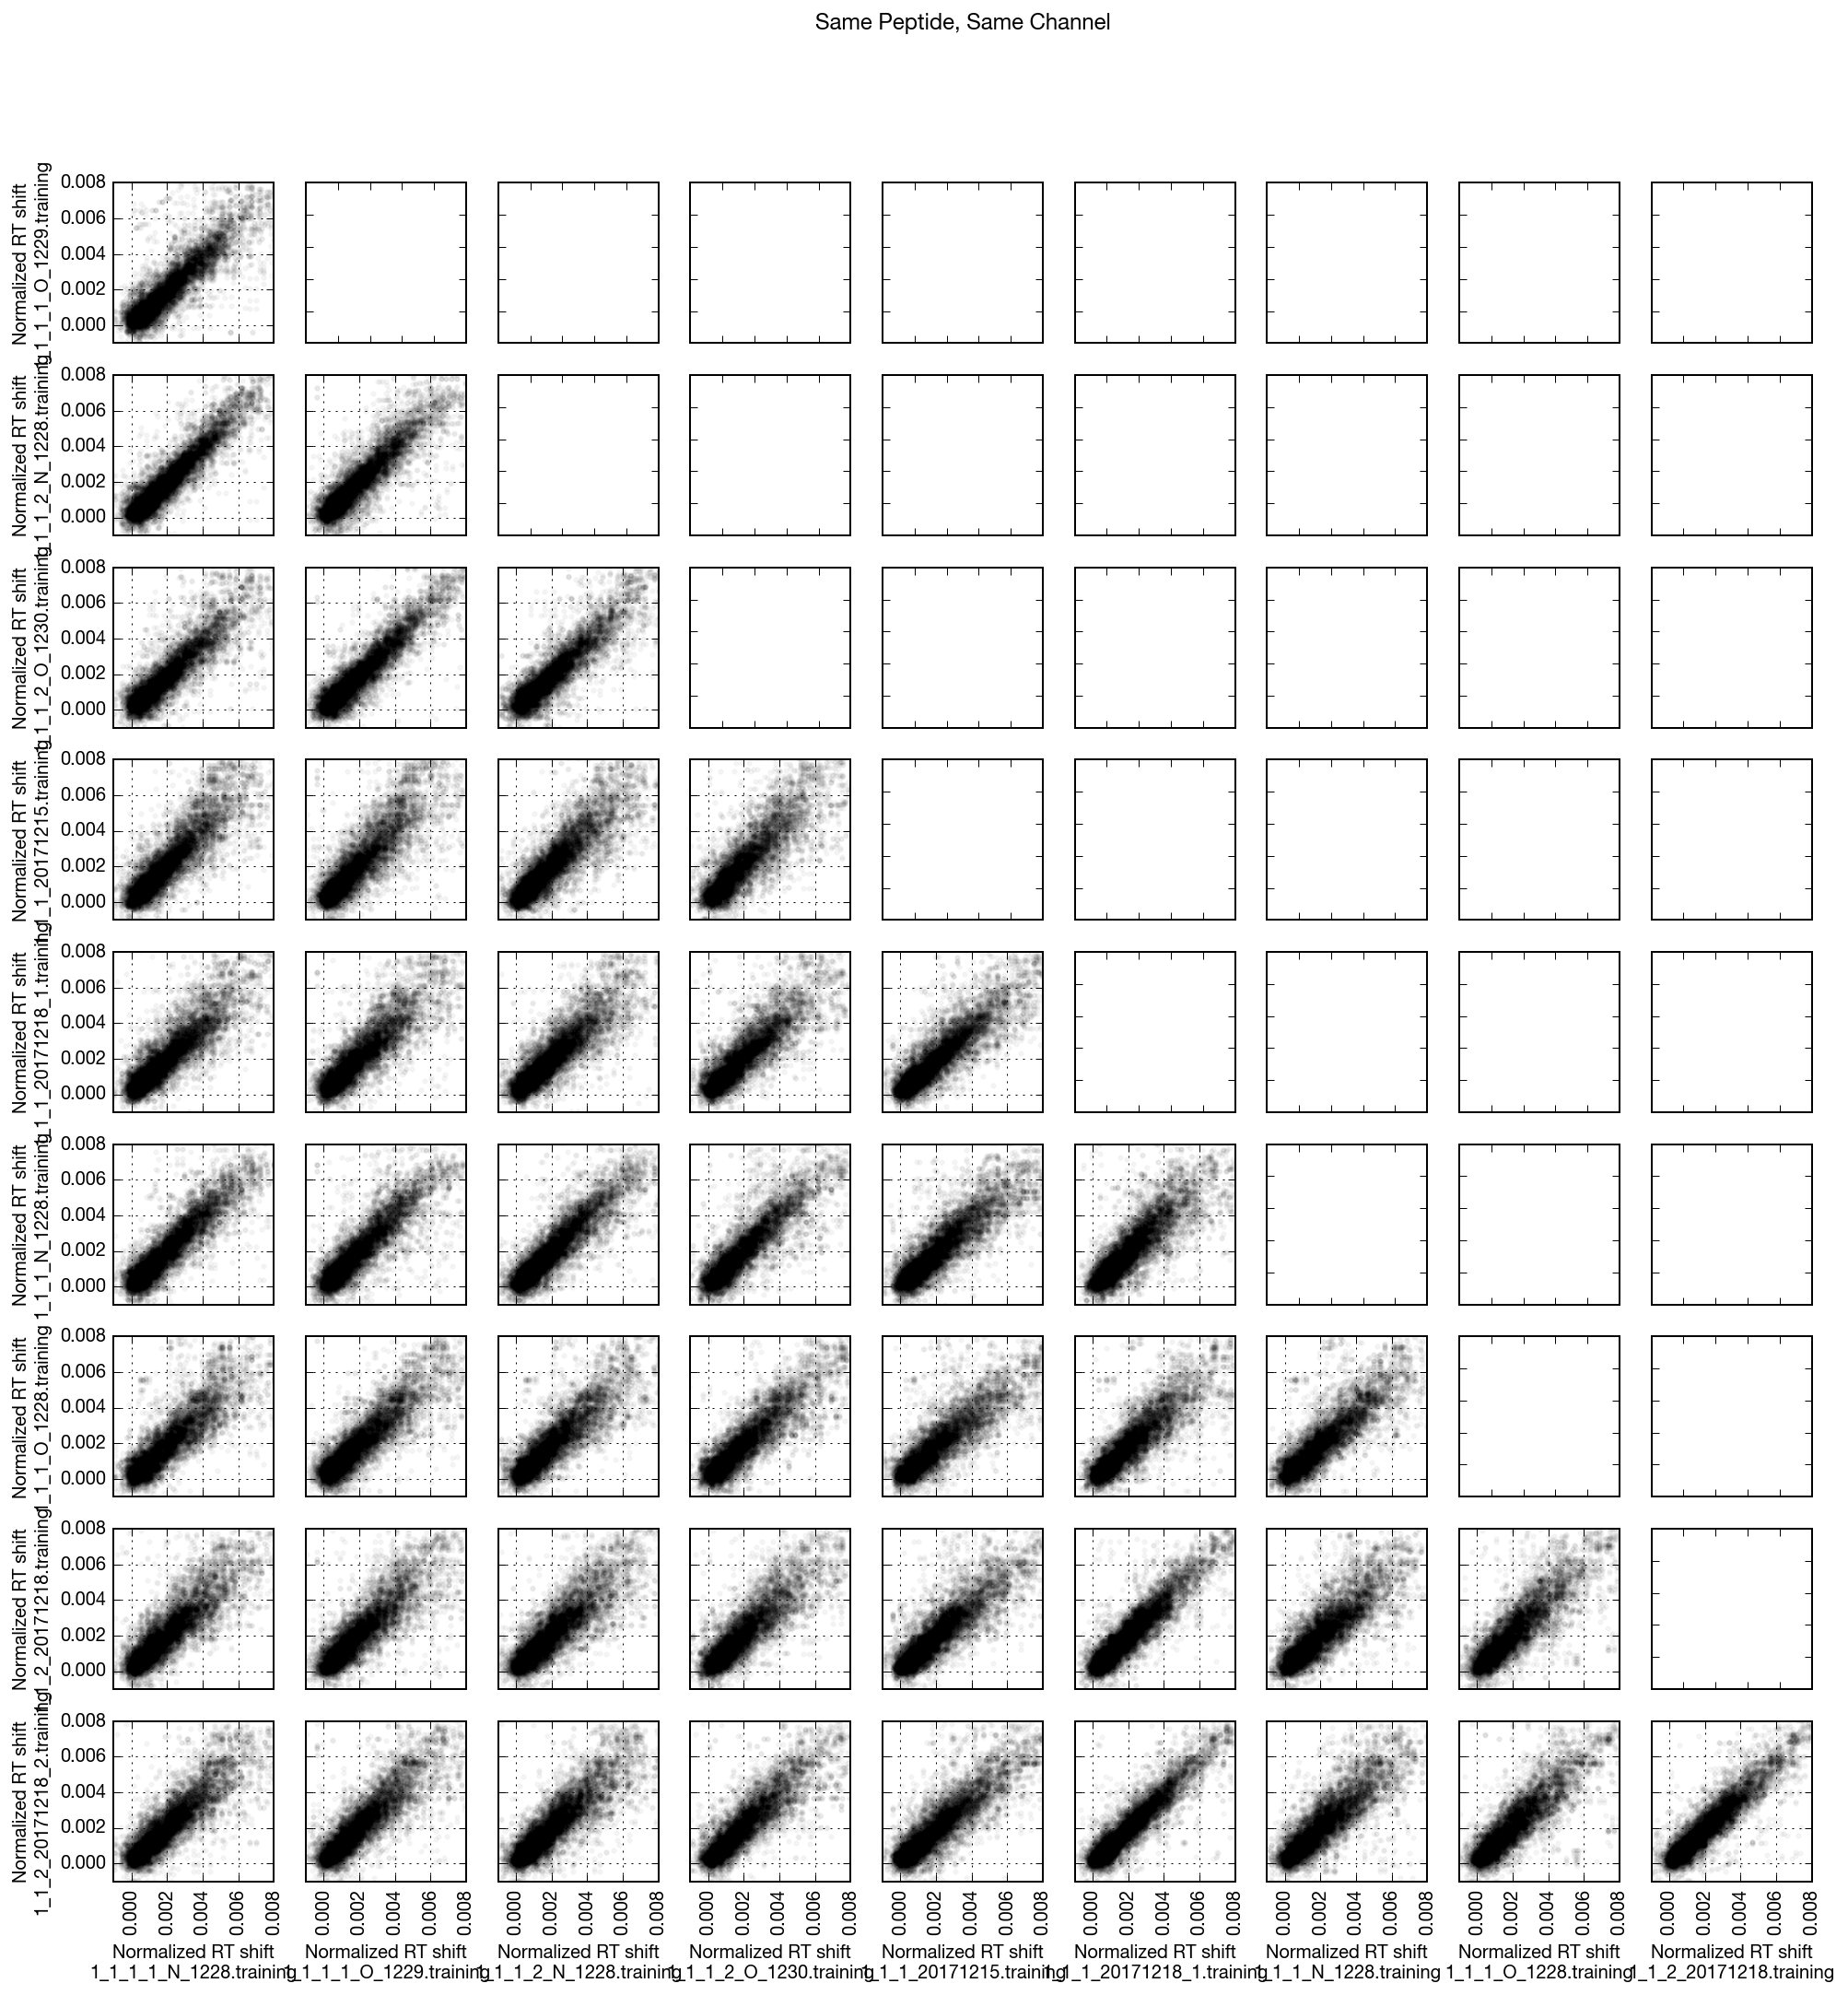

In [14]:
lTested = []

rcParams.max_open_warning=False
print('File1\tFile2\tCorrelation\tPValue\tRMSE\tMAE\tTableLength')
arrSize = len(lEtInfoNames)
fig, axarr = plt.subplots(arrSize-1, arrSize-1, figsize=(1+1.5*arrSize, 1+1.5*arrSize))
if arrSize ==2:
    axarr = np.array([[axarr]])

fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)
fig.suptitle("Same Peptide, Same Channel", fontsize=12)

for idx1, name1 in enumerate(lEtInfoNames):
    for idx2, name2 in enumerate(lEtInfoNames):
        if idx2==0 or idx1>=len(lEtInfoNames)-1:
            continue
        ax = axarr[idx2-1, idx1]
        if name1==name2:
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            continue
        if (name2, name1) in lTested:
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            continue
        lTested.append((name1, name2))
        df1 = dfMerged[dfMerged['SampleName']==name1]
        df2 = dfMerged[dfMerged['SampleName']==name2]
        df12 = pd.merge(df1, df2, how='inner', left_on=['Peptide', 'Channel'], right_on=['Peptide', 'Channel'])
        df12 = df12[df12['Channel']!=0]
        x = df12['NormedApexEtDiff_x']
        y = df12['NormedApexEtDiff_y']
        
        meanAbsDiff = (y - x).apply(abs).mean()
        rmsDiff = (y-x).std()
        corr, pval = scipy.stats.pearsonr(x, y)
        print('{0}\t{1}\t{2:.6f}\t{3:.6f}\t{4:.6f}\t{5:.6f}\t{6}'.format(idx1+1, idx2+1, corr, pval, rmsDiff, meanAbsDiff, len(df12)))
        
        ax.scatter(x, y, alpha=0.03, color='k', marker='.', rasterized=True)
        ax.set_xlim((-0.001, 0.008))
        ax.set_ylim((-0.001, 0.008))
        ax.set_xticks(ax.get_xticks()[1::2]) 
        ax.set_yticks(ax.get_yticks()[1::2]) 
        ax.grid()
        
        if idx2-1 == len(lEtInfoNames)-2:
            ax.set_xlabel('Normalized RT shift\n{}'.format(name1.replace('DE6plex_', '')\
                          .replace('.tsv', '').replace('_J100_NCP1', '').replace('_NCP1_J100', '')))
            ax.set_xticklabels(["%.3f"%x for x in ax.get_xticks()], rotation=90)
        else:
            ax.set_xticklabels([])
        if idx1 == 0:
            ax.set_ylabel('Normalized RT shift\n{}'.format(name2).replace('DE6plex_', '')\
                          .replace('.tsv', '').replace('_J100_NCP1', '').replace('_NCP1_J100', ''))
        else:
            ax.set_yticklabels([])
        
plt.savefig("ForPaperSCXLumos_ThermoUltimate3000_130m_compare_Dshifts_samePepChannel.pdf", format='pdf', dpi=400)

In [15]:
# 1. Peptide, Channel, Charge ~= Peptide, Channel

Check Properties of All samples

73542


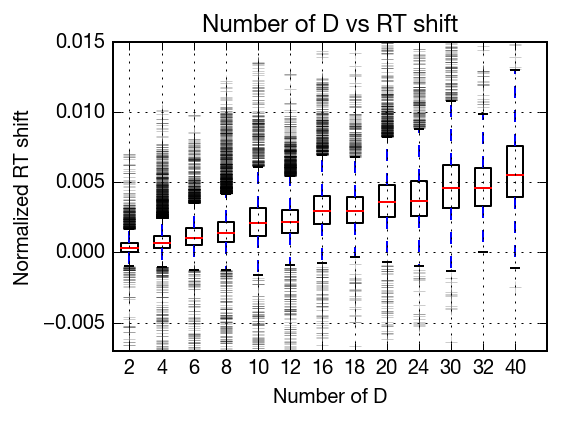

In [16]:
df = dfMerged
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111) 
x = sorted([dnum for dnum in set(df['Dnum']) if sum(df['Dnum']==dnum)>200])
y = [df[df['Dnum'] == dnum]['NormedApexEtDiff'] for dnum in x]
#dCorr = cal_dist_corr(x, y) # No dCorr calculation before subsampling
print(len(df))

bp = ax.boxplot(y)
for box in bp['boxes']:
    box.set( color='black', linewidth=1)
plt.setp(bp['fliers'], marker='+', markeredgecolor='black', alpha=0.2, linewidth=.6, rasterized=True) 
    
ax.set_xticks([xcoord+1 for xcoord in range(len(y) + 1)])
ax.set_xticklabels(x)

ax.set_title("Number of D vs RT shift")
ax.set_xlabel('Number of D')
ax.set_ylabel('Normalized RT shift')

ax.set_ylim((-0.007, 0.015))
#ax.set_yticks(ax.get_yticks()[1::2]) 
fig.tight_layout()
ax.grid()

plt.savefig("ForPaperSCXLumos_ThermoUltimate3000_130m_Dshift_vs_Dnum_box.pdf", format='pdf', dpi=300)

20 6525 0.00394002072717


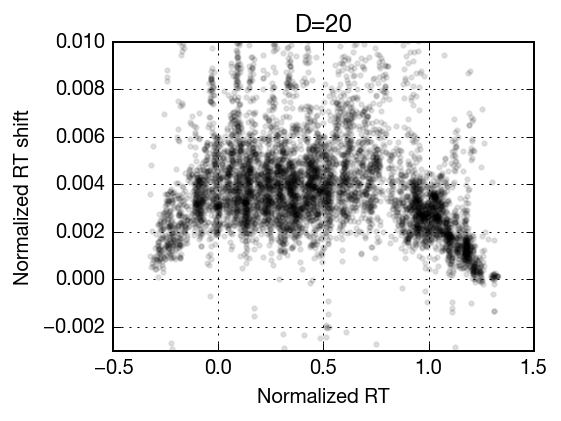

In [17]:
dnum = 20

df = dfMerged[dfMerged['Dnum'] == dnum]
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111) 
x = df['NormedRepreEt']
y = df['NormedApexEtDiff']
#dCorr = cal_dist_corr(x, y) # No dCorr calculation before subsampling
print(dnum, len(df), y.mean())
ax.scatter(x, y, alpha=0.1, color='k', marker='.', rasterized=True, label=dnum)

ax.set_title("D=%d"%(dnum))
ax.set_xlabel('Normalized RT')
ax.set_ylabel('Normalized RT shift')

ax.set_ylim((-0.003, 0.010))
ax.set_xlim((-0.5, 1.5))
ax.grid()
fig.tight_layout()

plt.savefig("ForPaperSCXLumos_ThermoUltimate3000_130m_Dshift_vs_NormedRepreEt_D={}.pdf".format(dnum), format='pdf', dpi=300)

20 6525 0.00394002072717


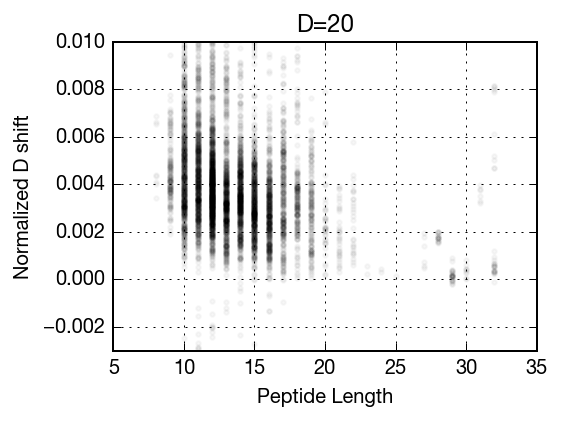

In [18]:
dnum = 20

df = dfMerged[dfMerged['Dnum'] == dnum]
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111) 
x = df['PeptideLength']
y = df['NormedApexEtDiff']
#dCorr = cal_dist_corr(x, y) # No dCorr calculation before subsampling
print(dnum, len(df), y.mean())
ax.scatter(x, y, alpha=0.03, color='k', marker='.', rasterized=True, label=dnum)

ax.set_title("D=%d"%(dnum))
ax.set_xlabel('Peptide Length')
ax.set_ylabel('Normalized D shift')

ax.set_ylim((-0.003, 0.010))
ax.grid()
fig.tight_layout()

plt.savefig("ForPaperSCXLumos_ThermoUltimate3000_130m_Dshift_vs_PepLen_D={}.pdf".format(dnum), format='pdf', dpi=300)

20 6525 0.00394002072717


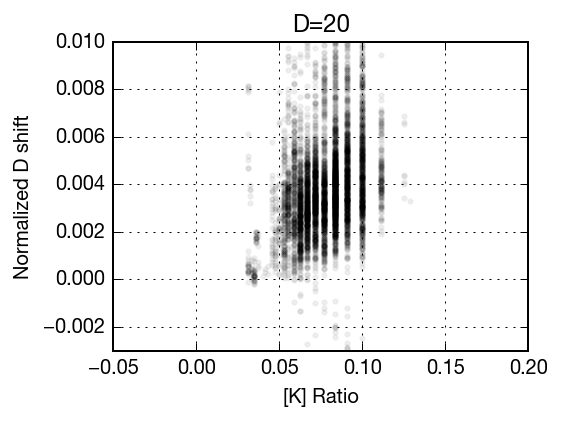

In [19]:
dnum = 20

df = dfMerged[dfMerged['Dnum'] == dnum]
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111) 
x = df['[K]Ratio']
y = df['NormedApexEtDiff']
#dCorr = cal_dist_corr(x, y) # No dCorr calculation before subsampling
print(dnum, len(df), y.mean())
ax.scatter(x, y, alpha=0.05, color='k', marker='.', rasterized=True, label=dnum)

ax.set_title("D=%d"%(dnum))
ax.set_xlabel('[K] Ratio')
ax.set_ylabel('Normalized D shift')

ax.set_xlim((-0.05, 0.2))
ax.set_ylim((-0.003, 0.010))
ax.grid()
fig.tight_layout()

plt.savefig("ForPaperSCXLumos_ThermoUltimate3000_130m_Dshift_vs_[K]Ratio_D={}.pdf".format(dnum), format='pdf', dpi=300)

Subsample by peptide

In [20]:
from collections import defaultdict

dPepMap = defaultdict(list)
for name in lEtInfoNames:
    df = dfMerged[dfMerged['SampleName']==name]
    dfGrouped = df.groupby('DEFeatureIdx')
    for idx, dfMini in dfGrouped:
        row = next(dfMini.iterrows())[1]
        pep = row['Peptide']
        summedCosines = dfMini['Cosine'].sum()
        #summedQuantities = dfMini['Quantity'].sum()
        dPepMap[pep].append((name, idx, len(dfMini), summedCosines))
        #dPepMap[pep].append((name, idx, len(dfMini), summedQuantities))


In [21]:
from collections import Counter

keyEx = next(iter(dPepMap))
print(keyEx, dPepMap[keyEx])
print(Counter(map(len, dPepMap.values())))
print(sum([len(x) for x in dPepMap.values()]))
print(len(dPepMap))

EVKGDLENAFLNLVQCIQNKPLYFADR [('DE6plex_1_1_1_1_N_J100_NCP1_1228.training.tsv', 368, 1, 0.91264159999999994), ('DE6plex_1_1_1_2_N_J100_NCP1_1228.training.tsv', 288, 1, 0.90107819999999994), ('DE6plex_1_1_1_2_O_J100_NCP1_1230.training.tsv', 1407, 1, 0.90040599999999993), ('DE6plex_1_1_1_NCP1_J100_20171215.training.tsv', 79, 1, 0.90307060000000006), ('DE6plex_1_1_1_NCP1_J100_20171215.training.tsv', 261, 1, 0.90573230000000005), ('DE6plex_1_1_1_NCP1_J100_20171215.training.tsv', 1530, 3, 2.7129620999999999), ('DE6plex_1_1_1_NCP1_J100_20171215.training.tsv', 2196, 2, 1.8106884999999999), ('DE6plex_1_1_1_NCP1_J100_20171215.training.tsv', 2323, 1, 0.90225979999999995), ('DE6plex_1_1_1_NCP1_J100_20171218_1.training.tsv', 166, 1, 0.90567450000000005), ('DE6plex_1_1_1_NCP1_J100_20171218_1.training.tsv', 1294, 2, 1.8114647000000001), ('DE6plex_1_1_1_NCP1_J100_20171218_1.training.tsv', 1636, 1, 0.90766840000000015), ('DE6plex_1_1_1_NCP1_J100_20171218_1.training.tsv', 1872, 1, 0.9025915000000001), (

In [22]:
from operator import itemgetter
import random

lSelectedFeatures = []
dCounter = defaultdict(int)
cntr = 0
nSameChannels = 0
nSameQuants = 0

for pep, lInfo in dPepMap.items():
    if len(lInfo) == 1: # if peptide is unique
        lSelectedFeatures.append(lInfo[0])
    else:
        lSortedInfos = sorted(lInfo, key=lambda x: (x[2], x[3]), reverse=True) # sortby peptidelen, summed cosines or quantities
        lBestInfo = lSortedInfos[0]
        lBestInfoLists = [x for x in lSortedInfos if x[2]==lBestInfo[2] and x[3]==lBestInfo[3]]
        
        if len(lBestInfoLists) > 1:
            lSelectedFeatures.append(random.choice(lBestInfoLists))
            nSameQuants += 1
        else:
            lSelectedFeatures.append(lBestInfoLists[0])
            
        if len([x for x in lSortedInfos if x[2]==lBestInfo[2]]) > 1:
            nSameChannels += 1
            
                
print(len(lSelectedFeatures))

print('Same Channels: ', nSameChannels)
print('Same Channels, Same Cosines: ', nSameQuants)
            

2882
Same Channels:  1478
Same Channels, Same Cosines:  1


In [23]:
# Double checking

import sys

before = 0
for n, selected in enumerate(lSelectedFeatures):
    if n-before==len(lSelectedFeatures)//1000:
        sys.stderr.write('\r                                   ')
        sys.stderr.write('\r{0:.2f}% done'.format(100.*n/len(lSelectedFeatures)))
        before = n
    pep = dfMerged[(dfMerged['SampleName']==selected[0]) & (dfMerged['DEFeatureIdx']==selected[1])]['Peptide'].iloc[0]
    for info in dPepMap[pep]:
        if info==selected:
            continue
        if info[2]>selected[2]:
            print(dPepMap[pep])
            print(selected)
            raise ValueError("Selected DEFeature does not contains maximum number of channels")
            
        if info[2]==selected[2] and info[3]>selected[3]:
            print(dPepMap[pep])
            print(selected)
            raise ValueError("Selected DEFeature does not containes the maximum Cosine")
        
            
sys.stderr.write('\r                                   ')
sys.stderr.write('\r100% done')
            

100% done                          

In [42]:
print(len(lSelectedFeatures))

2882


In [24]:
lToConcat = []

before = 0
for n, selected in enumerate(lSelectedFeatures):
    if n-before==len(lSelectedFeatures)//1000:
        sys.stderr.write('\r                                   ')
        sys.stderr.write('\r{0:.2f}% done'.format(100.*n/len(lSelectedFeatures)))
        before = n
    lToConcat.append(dfMerged[(dfMerged['SampleName']==selected[0]) & (dfMerged['DEFeatureIdx']==selected[1])])
sys.stderr.write('\r                                   ')
sys.stderr.write('\r100% done')

dfSampled = pd.concat(lToConcat, ignore_index=True)

100% done                          

In [25]:
print(len(dfSampled))
print(len(set(dfSampled['Peptide'])))
dfSampled.head(10)

10092
2882


,DEFeatureIdx,Peptide,Charge,SpecEValue,Channel,Quantity,Cosine,NormedApexEtDiff,Dnum,NormedRepreEt,PeptideLength,[K]Ratio,SampleName
0,1389,EVKGDLENAFLNLVQCIQNKPLYFADR,4,2.342327e-19,1,19326970.0,0.909027,0.000095,6,1.191970,27,0.074074,DE6plex_1_1_2_NCP1_J100_20171218_2.training.tsv
1,1389,EVKGDLENAFLNLVQCIQNKPLYFADR,4,2.342327e-19,2,17495890.0,0.908607,0.000112,12,1.191970,27,0.074074,DE6plex_1_1_2_NCP1_J100_20171218_2.training.tsv
2,1389,EVKGDLENAFLNLVQCIQNKPLYFADR,4,2.342327e-19,3,19639900.0,0.911572,0.000659,18,1.191970,27,0.074074,DE6plex_1_1_2_NCP1_J100_20171218_2.training.tsv
3,429,VPTANVSVVDLTCR,2,6.590483e-18,1,57525920.0,0.996943,0.000275,2,0.335254,14,0.000000,DE6plex_1_1_1_O_J100_NCP1_1228.training.tsv
4,429,VPTANVSVVDLTCR,2,6.590483e-18,2,55259020.0,0.995364,0.000514,4,0.335254,14,0.000000,DE6plex_1_1_1_O_J100_NCP1_1228.training.tsv
5,429,VPTANVSVVDLTCR,2,6.590483e-18,3,65478940.0,0.996439,0.001196,6,0.335254,14,0.000000,DE6plex_1_1_1_O_J100_NCP1_1228.training.tsv
6,429,VPTANVSVVDLTCR,2,6.590483e-18,4,51219340.0,0.997564,0.001609,8,0.335254,14,0.000000,DE6plex_1_1_1_O_J100_NCP1_1228.training.tsv
7,429,VPTANVSVVDLTCR,2,6.590483e-18,5,55256120.0,0.992049,0.002036,10,0.335254,14,0.000000,DE6plex_1_1_1_O_J100_NCP1_1228.training.tsv
8,1674,LLYNRPGTVSSLKK,4,3.699486e-14,1,16661050.0,0.952072,0.001630,6,0.032338,14,0.142857,DE6plex_1_1_1_NCP1_J100_20171215.training.tsv
9,1674,LLYNRPGTVSSLKK,4,3.699486e-14,2,13695080.0,0.911254,0.003325,12,0.032338,14,0.142857,DE6plex_1_1_1_NCP1_J100_20171215.training.tsv


In [26]:
dfSampled.to_csv('D-shifts_UniquePepSampled_ForPaperSCXLumos_ThermoUltimate3000_130m.csv', index=False)

Read saved subsampled file

In [27]:
dfSampled = pd.io.parsers.read_csv("./LibSVM_data/D-shifts_UniquePepSampled_ForPaperSCXLumos_ThermoUltimate3000_130m.csv")

In [28]:
dfSampled.head()

,DEFeatureIdx,Peptide,Charge,SpecEValue,Channel,Quantity,Cosine,NormedApexEtDiff,Dnum,NormedRepreEt,PeptideLength,[K]Ratio,SampleName
0,1389,EVKGDLENAFLNLVQCIQNKPLYFADR,4,2.342327e-19,1,19326970.0,0.909027,0.000095,6,1.191970,27,0.074074,DE6plex_1_1_2_NCP1_J100_20171218_2.training.tsv
1,1389,EVKGDLENAFLNLVQCIQNKPLYFADR,4,2.342327e-19,2,17495890.0,0.908607,0.000112,12,1.191970,27,0.074074,DE6plex_1_1_2_NCP1_J100_20171218_2.training.tsv
2,1389,EVKGDLENAFLNLVQCIQNKPLYFADR,4,2.342327e-19,3,19639900.0,0.911572,0.000659,18,1.191970,27,0.074074,DE6plex_1_1_2_NCP1_J100_20171218_2.training.tsv
3,429,VPTANVSVVDLTCR,2,6.590483e-18,1,57525920.0,0.996943,0.000275,2,0.335254,14,0.000000,DE6plex_1_1_1_O_J100_NCP1_1228.training.tsv
4,429,VPTANVSVVDLTCR,2,6.590483e-18,2,55259020.0,0.995364,0.000514,4,0.335254,14,0.000000,DE6plex_1_1_1_O_J100_NCP1_1228.training.tsv


Standardize and Save Data

In [29]:
lStandardizedFeatures = "Dnum NormedRepreEt PeptideLength [K]Ratio".split()

In [30]:
with open('D-shifts_libSVMData_UniquePepSampled_ForPaperSCXLumos_ThermoUltimate3000_130m.standard', 'w') as outfile:
    for colname in lStandardizedFeatures:
        se = dfSampled[colname]
        seStand = (se - se.mean())/se.std()
        outstr = '{} {} {}'.format(colname, se.mean(), se.std())
        print(outstr, file=outfile) 
        dfSampled[colname + '_Standardized'] = seStand


In [31]:
with open('./D-shifts_libSVMData_UniquePepSampled_ForPaperSCXLumos_ThermoUltimate3000_130m.standardized.txt', 'w') as outfile:
    for _, row in dfSampled.iterrows():
        outstr = '{} 1:{} 2:{} 3:{} 4:{}'.format(row['NormedApexEtDiff'],
                                                 row['Dnum_Standardized'],
                                                 row['NormedRepreEt_Standardized'],
                                                 row['PeptideLength_Standardized'],
                                                 row['[K]Ratio_Standardized'],)
        print(outstr, file=outfile)

In [32]:
dfSampled.to_csv('D-shifts_UniquePepSampled_ForPaperSCXLumos_ThermoUltimate3000_130m.standardized.csv', index=False)

Save only one feature for each training data

In [33]:

#for feature in ['Dnum_Standardized', 'NormedRepreEt_Standardized', 'PeptideLength_Standardized','[K]Ratio_Standardized', 'NormedInitSignalWidth_Standardized']:
#    with open('./D-shifts_libSVMData_UniquePepSampled_ThermoLC_QE_08250913.standardized.{}.txt'.format(feature), 'w') as outfile:
#        for _, row in dfSampled.iterrows():
#            outstr = '{} 1:{}'.format(row['NormedApexEtDiff'], row[feature])
#            print(outstr, file=outfile)

Check Properties of Subsampled Data

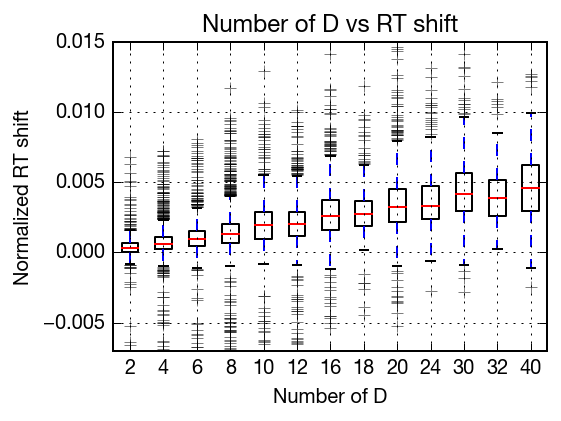

In [34]:
df = dfSampled
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111) 
x = sorted([dnum for dnum in set(df['Dnum']) if sum(df['Dnum']==dnum)>50])
y = [df[df['Dnum'] == dnum]['NormedApexEtDiff'] for dnum in x]

bp = ax.boxplot(y)
for box in bp['boxes']:
    box.set( color='black', linewidth=1)
plt.setp(bp['fliers'], marker='+', markeredgecolor='black', alpha=0.5, linewidth=.6, rasterized=True) 
    
ax.set_xticks([xcoord+1 for xcoord in range(len(y))])
ax.set_xticklabels(x)

ax.set_title("Number of D vs RT shift")
ax.set_xlabel('Number of D')
ax.set_ylabel('Normalized RT shift')

ax.set_ylim((-0.007, 0.015))
#ax.set_yticks(ax.get_yticks()[1::2]) 
fig.tight_layout()
ax.grid()

plt.savefig("ForPaperSCXLumos_ThermoUltimate3000_130m_subsampled_Dshift_vs_Dnum_box.pdf", format='pdf', dpi=300)

20 837 0.00352688080197 0.449857320425 0.2791112307071485


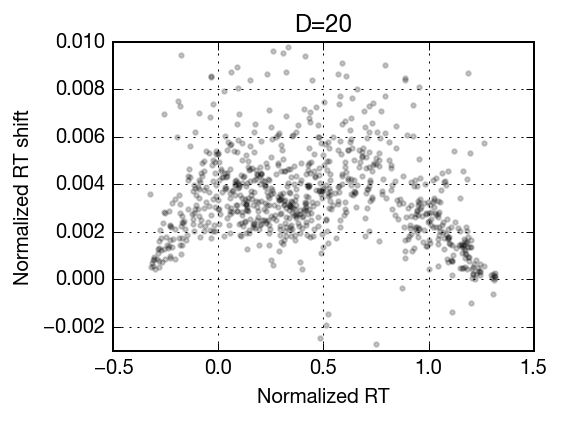

In [35]:
dnum = 20

df = dfSampled[dfSampled['Dnum'] == dnum]
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111) 
x = df['NormedRepreEt']
y = df['NormedApexEtDiff']
dCorr = cal_dist_corr(x, y)
print(dnum, len(df), y.mean(), x.mean(), dCorr)
ax.scatter(x, y, alpha=0.2, color='k', marker='.', rasterized=True, label=dnum)

ax.set_title("D=%d"%(dnum))
ax.set_xlabel('Normalized RT')
ax.set_ylabel('Normalized RT shift')

ax.set_ylim((-0.003, 0.010))
ax.set_xlim((-0.5, 1.5))
ax.grid()
fig.tight_layout()

plt.savefig("ForPaperSCXLumos_ThermoUltimate3000_130m_subsampled_Dshift_vs_NormedRepreEt_D={}.pdf".format(dnum), format='pdf', dpi=300)

20 837 0.00352688080197 13.7228195938 0.28358193525523057


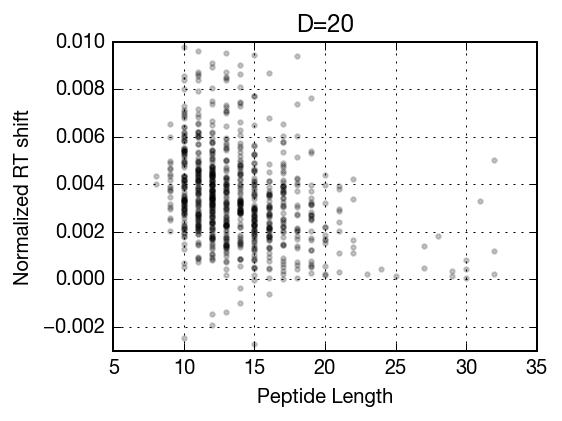

In [36]:
dnum = 20

df = dfSampled[dfSampled['Dnum'] == dnum]
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111) 
x = df['PeptideLength']
y = df['NormedApexEtDiff']
dCorr = cal_dist_corr(x, y)
print(dnum, len(df), y.mean(), x.mean(), dCorr)
ax.scatter(x, y, alpha=0.2, color='k', marker='.', rasterized=True, label=dnum)

ax.set_title("D=%d"%(dnum))
ax.set_xlabel('Peptide Length')
ax.set_ylabel('Normalized RT shift')

ax.set_ylim((-0.003, 0.010))
ax.grid()
fig.tight_layout()

plt.savefig("ForPaperSCXLumos_ThermoUltimate3000_130m_subsampled_Dshift_vs_PepLen_D={}.pdf".format(dnum), format='pdf', dpi=300)

20 837 0.00352688080197 0.080084732994 0.2589117043641903


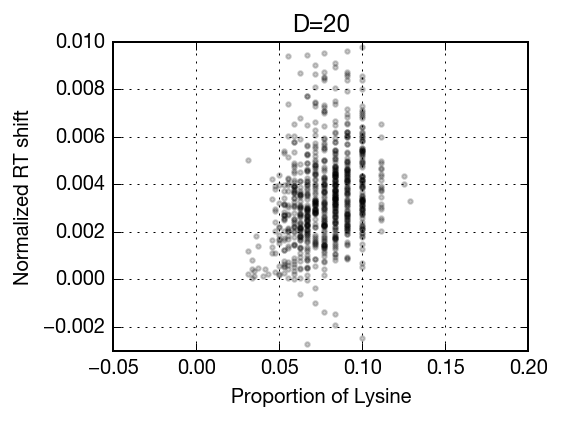

In [37]:
dnum = 20

df = dfSampled[dfSampled['Dnum'] == dnum]
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111) 
x = df['[K]Ratio']
y = df['NormedApexEtDiff']
dCorr = cal_dist_corr(x, y)
print(dnum, len(df), y.mean(), x.mean(), dCorr)
ax.scatter(x, y, alpha=0.2, color='k', marker='.', rasterized=True, label=dnum)

ax.set_title("D=%d"%(dnum))
ax.set_xlabel('Proportion of Lysine')
ax.set_ylabel('Normalized RT shift')

ax.set_xlim((-0.05, 0.2))
ax.set_ylim((-0.003, 0.010))
ax.grid()
fig.tight_layout()

plt.savefig("ForPaperSCXLumos_ThermoUltimate3000_130m_subsampled_Dshift_vs_[K]Ratio_D={}.pdf".format(dnum), format='pdf', dpi=300)

In [38]:
lTestDnum = [16, 18, 20]

lAllDf = []
for testDnum in lTestDnum:
    df = dfSampled[(dfSampled['Dnum']==testDnum)]
    print(testDnum)
    print(len(df))
    dfDistCorrAANormedDiff = pd.DataFrame(cal_dist_corr_aminoacids(df))
    dfDistCorrAANormedDiff.columns = "AminoAcid DistanceCorr_{}".format(testDnum).split()
    lAllDf.append(dfDistCorrAANormedDiff)
    

16
906
18
350
20
837


In [40]:
df = lAllDf[0]
for dfNew in lAllDf[1:]:
    df = df.merge(dfNew, on='AminoAcid')

df.reindex(df.sum(axis=1).sort_values(ascending=False).index)

,AminoAcid,DistanceCorr_16,DistanceCorr_18,DistanceCorr_20
16,K,0.196007,0.142206,0.258912
13,P,0.117005,0.192604,0.160511
14,R,0.101417,0.225606,0.102594
2,L,0.089127,0.189630,0.100711
15,H,0.081416,0.169505,0.094999
3,M,0.083855,0.118414,0.123068
7,S,0.073151,0.134180,0.097847
8,T,0.091862,0.078626,0.122465
4,F,0.087958,0.095339,0.108016
5,Y,0.095746,0.084148,0.092997
